<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# 원래 데이터 (예: 관측치 1~5)
data = [1, 2, 3, 4, 5]

# 부트스트랩 샘플링: 복원 추출 (with replacement)
# numpy 사용
bootstrap_sample = np.random.choice(data, size=len(data), replace=True)

print("원본 데이터:", data)
print("부트스트랩 샘플:", bootstrap_sample)


원본 데이터: [1, 2, 3, 4, 5]
부트스트랩 샘플: [2 5 4 1 1]


In [2]:
import random

data = [1, 2, 3, 4, 5]

# random.choices도 복원 추출을 기본으로 합니다
bootstrap_sample = random.choices(data, k=len(data))

print("원본 데이터:", data)
print("부트스트랩 샘플:", bootstrap_sample)


원본 데이터: [1, 2, 3, 4, 5]
부트스트랩 샘플: [4, 2, 2, 1, 3]


Bootstrap된 중앙값들의 평균: 11.5129
Bootstrap된 중앙값들의 표준편차: 1.8738


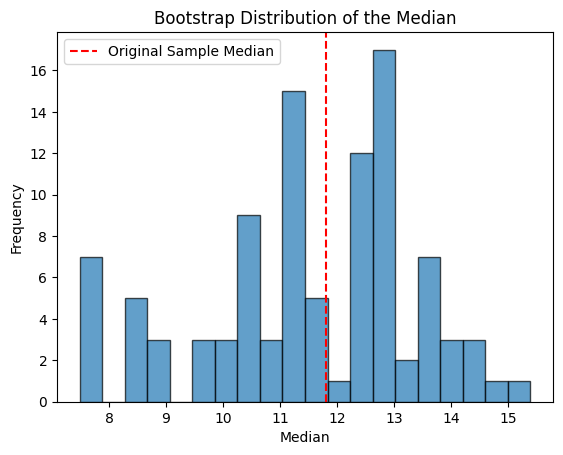

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 모집단 생성: 카이제곱 분포 (df=10이면 right-skewed)
population = np.random.chisquare(df=10, size=10000)

# 2. 모집단에서 랜덤하게 20개 샘플 추출 (비복원추출)
sample = np.random.choice(population, size=20, replace=False)

# 3. 부트스트랩: 100개의 샘플, 각 샘플은 20개 원소
n_bootstrap = 100
bootstrap_medians = []

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample, size=20, replace=True)
    median = np.median(bootstrap_sample)
    bootstrap_medians.append(median)

median_mean = np.mean(bootstrap_medians)
median_std = np.std(bootstrap_medians)

print(f"Bootstrap된 중앙값들의 평균: {median_mean:.4f}")
print(f"Bootstrap된 중앙값들의 표준편차: {median_std:.4f}")

# 4. 시각화: 부트스트랩된 중앙값 분포
plt.hist(bootstrap_medians, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(np.median(sample), color='red', linestyle='dashed', label='Original Sample Median')
plt.title('Bootstrap Distribution of the Median')
plt.xlabel('Median')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [4]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. 데이터 생성
#X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)
# 비선형 구조 포함한 y 생성
X, _ = make_regression(n_samples=200, n_features=5, noise=5, random_state=42)
y = X[:, 0] ** 2 + np.sin(X[:, 1]) + X[:, 2] * X[:, 3] + np.random.normal(0, 1, size=200)

# 2. Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 예측 결과 저장용 리스트
lr_test_preds = []
tree_test_preds = []

# 3. 부트스트랩 샘플링 & 모델 학습/예측
n_bootstrap = 100
for _ in range(n_bootstrap):
    # Train set에서 부트스트랩 샘플 생성
    X_sample, y_sample = resample(X_train, y_train, replace=True)

    # 선형 회귀 모델 학습 및 테스트셋 예측
    lr = LinearRegression()
    lr.fit(X_sample, y_sample)
    lr_pred = lr.predict(X_test)
    lr_test_preds.append(lr_pred)

    # 결정 트리 회귀 모델 학습 및 테스트셋 예측
    tree = DecisionTreeRegressor()
    tree.fit(X_sample, y_sample)
    tree_pred = tree.predict(X_test)
    tree_test_preds.append(tree_pred)

# 4. 평균 예측값 계산 (Bagging 결과)
lr_bagged_preds = np.mean(lr_test_preds, axis=0)
tree_bagged_preds = np.mean(tree_test_preds, axis=0)

# 5. 성능 평가 (Test Set 기준)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_bagged_preds))
lr_r2 = r2_score(y_test, lr_bagged_preds)

tree_rmse = np.sqrt(mean_squared_error(y_test, tree_bagged_preds))
tree_r2 = r2_score(y_test, tree_bagged_preds)

# 6. 결과 출력
print("=== Bagged Linear Regression ===")
print(f"RMSE: {lr_rmse:.4f}")
print(f"R^2 : {lr_r2:.4f}")

print("\n=== Bagged Decision Tree ===")
print(f"RMSE: {tree_rmse:.4f}")
print(f"R^2 : {tree_r2:.4f}")


=== Bagged Linear Regression ===
RMSE: 2.0689
R^2 : -0.0800

=== Bagged Decision Tree ===
RMSE: 1.2938
R^2 : 0.5777


In [5]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 로딩
data = fetch_california_housing()
X, y = data.data, data.target

# 2. Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Bagging 수행
n_bootstrap = 100
lr_preds, tree_preds = [], []

for _ in range(n_bootstrap):
    # 부트스트랩 샘플링
    X_sample, y_sample = resample(X_train, y_train, replace=True)

    # 선형 회귀
    lr = LinearRegression()
    lr.fit(X_sample, y_sample)
    lr_preds.append(lr.predict(X_test))

    # 결정 트리
    tree = DecisionTreeRegressor()
    tree.fit(X_sample, y_sample)
    tree_preds.append(tree.predict(X_test))

# 4. Bagging 결과 (평균 예측)
lr_bagged = np.mean(lr_preds, axis=0)
tree_bagged = np.mean(tree_preds, axis=0)

# 5. 성능 평가
def evaluate_model(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"=== {label} ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2 : {r2:.4f}\n")

evaluate_model(y_test, lr_bagged, "Bagged Linear Regression")
evaluate_model(y_test, tree_bagged, "Bagged Decision Tree")


=== Bagged Linear Regression ===
RMSE: 0.7282
R^2 : 0.5960

=== Bagged Decision Tree ===
RMSE: 0.5066
R^2 : 0.8045



In [6]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 로딩 및 분할
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Bagging 구현 (Linear & Tree)
n_bootstrap = 100
lr_preds, tree_preds = [], []

for _ in range(n_bootstrap):
    X_sample, y_sample = resample(X_train, y_train, replace=True)

    # 선형 회귀
    lr = LinearRegression()
    lr.fit(X_sample, y_sample)
    lr_preds.append(lr.predict(X_test))

    # 결정 트리
    tree = DecisionTreeRegressor()
    tree.fit(X_sample, y_sample)
    tree_preds.append(tree.predict(X_test))

# 평균 예측
lr_bagged = np.mean(lr_preds, axis=0)
tree_bagged = np.mean(tree_preds, axis=0)

# 3. Random Forest 학습 및 예측
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 4. 성능 비교 함수
def evaluate_model(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"=== {label} ===")
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2 : {r2:.4f}\n")

# 5. 결과 출력
evaluate_model(y_test, lr_bagged, "Bagged Linear Regression")
evaluate_model(y_test, tree_bagged, "Bagged Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")


=== Bagged Linear Regression ===
RMSE: 0.7286
R^2 : 0.5956

=== Bagged Decision Tree ===
RMSE: 0.5038
R^2 : 0.8066

=== Random Forest ===
RMSE: 0.5065
R^2 : 0.8046



In [7]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 로딩 및 분할
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. 하이퍼파라미터 그리드 정의
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 0.5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. RandomForest 모델과 RandomizedSearchCV 설정
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 4. 튜닝 수행
random_search.fit(X_train, y_train)

# 5. 베스트 모델로 예측
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 6. 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Tuned Random Forest ===")
print("Best Params:", random_search.best_params_)
print(f"RMSE: {rmse:.4f}")
print(f"R^2 : {r2:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

=== Tuned Random Forest ===
Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
RMSE: 0.4934
R^2 : 0.8145
